In [162]:
# import sys
# !{sys.executable} -m pip install recpack --upgrade

In [1]:
import recpack

In [2]:
import sys, warnings, time, os, copy, gc, re, random, pickle#, cudf
warnings.filterwarnings('ignore')
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from pandas.io.json import json_normalize
from pprint import pprint
from pathlib import Path
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
from datetime import datetime, timedelta
#import cudf

from sklearn.cluster import KMeans
from sklearn import preprocessing
import random
from sklearn.metrics import classification_report
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SepidehHabibiabad\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SepidehHabibiabad\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SepidehHabibiabad\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [75]:
articles = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/articles.csv')
# customers = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/customers.csv')
# sample_submisison = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/sample_submission.csv')
# transactions = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/transactions_train.csv')

In [76]:
# transactions.to_feather('transactions_train.feather')
articles.to_feather('articles.feather')
# customers.to_feather('customers.feather')
articles = pd.read_feather('articles.feather')
# customers = pd.read_feather('customers.feather')
# transactions = pd.read_feather('transactions_train.feather')

In [5]:
def customer_id_to_int(x): return int(x[-16:], 16)

# customers preprocessing

In [6]:
customers = customers.drop(['postal_code','Active','FN'], axis=1)

In [7]:
customers['age'].fillna(int((customers['age'].mean())), inplace=True)
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace({np.nan :0,'NONE':0, 'None':0, 'Monthly':1, 'Regularly':2})
customers['club_member_status'] = customers['club_member_status'].replace({np.nan :0, 'PRE-CREATE':1, 'ACTIVE':2, 'LEFT CLUB':-1})

In [8]:
def clustering(df, predcol, usecol, clusters=12):

    X = np.array(df[usecol])

#     norming numbers
    nm = preprocessing.StandardScaler()
    X = nm.fit_transform(X)

            #km = KMeans(n_clusters=clusters, random_state=2022)
    km = KMeans(n_clusters=clusters, 
                init='k-means++', 
                random_state=2022)
    km.fit(X)
    distortion = km.inertia_

    pred = km.labels_
    df_pred = pd.DataFrame(pred, columns=['pred'])
    df_pred = pd.concat([df, df_pred], axis=1)

    df_norm = pd.DataFrame(X, columns=usecol)
    #print(df_norm.describe())
    
    return df_pred, distortion

In [9]:
usecol = ['club_member_status', 'fashion_news_frequency', 'age']
predcol = ['customer_id']
dfCustomers, dist = clustering(customers,predcol=predcol, usecol=usecol, clusters=5)

In [10]:
# dfCustomers['customer_id'] = dfCustomers['customer_id'].apply(customer_id_to_int).astype('int32')

In [11]:
dfCustomers.drop(columns=['club_member_status','fashion_news_frequency','age'],inplace=True)

In [12]:
dfCustomers

,customer_id,pred
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,3
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,2
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,2
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1


# transactions preprocessing

In [13]:
transactions = transactions.drop(['sales_channel_id'], axis=1)
transactions.drop_duplicates(inplace=True)
transactions = transactions.dropna()
# transactions['article_id'] = transactions['article_id'].astype('int8')
# transactions['customer_id'] = transactions['customer_id'].apply(customer_id_to_int).astype('int32')

In [14]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions['week'] = 104 - (transactions.t_dat.max() - transactions.t_dat).dt.days // 7
last_month = transactions['week'].max() - 4
transactions = transactions.loc[transactions["week"] >= last_month]
transactions

,t_dat,customer_id,article_id,price,week
30488290,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,784053005,0.050831,100
30488292,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,926921001,0.033881,100
30488293,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,868038001,0.050831,100
30488295,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,851124001,0.033881,100
30488296,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,897189001,0.042356,100
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,104
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,104
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,104
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,104


# preprocessing the articles

In [15]:
# articles['product_code'] = articles['article_id'].astype('int8')
# articles['prod_name'] = articles['prod_name'].apply(preprocess_text)

In [16]:
# from sentence_transformers import SentenceTransformer
# from sklearn.decomposition import PCA

In [17]:
# sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
# text_features = sbert_model.encode(articles['detail_desc'].map(str).values.tolist()).tolist()
# text_transformation = PCA(n_components=16).fit_transform(text_features).tolist()
# articles[[f'detail_desc_{i}' for i in range(16)]] = pd.DataFrame(text_transformation)

In [77]:
articles.drop(
        columns=['prod_name','product_type_name','product_type_no','product_group_name', 'graphical_appearance_name','graphical_appearance_no', 'colour_group_name',
                 'perceived_colour_value_name','perceived_colour_value_name',
                 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name',
                 'garment_group_name','perceived_colour_value_id','perceived_colour_master_id','department_no','index_code','index_group_no',
                      'section_no','garment_group_no'], inplace=True)

In [78]:
articles

,article_id,product_code,colour_group_code,detail_desc
0,108775015,108775,9,Jersey top with narrow shoulder straps.
1,108775044,108775,10,Jersey top with narrow shoulder straps.
2,108775051,108775,11,Jersey top with narrow shoulder straps.
3,110065001,110065,9,"Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,10,"Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...
105537,953450001,953450,9,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,9,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,9,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,9,Large plastic hair claw.


In [20]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [100]:
# articles['str'] =articles['detail_desc'].apply(lambda x: str(x))
# articles['tokens'] =articles['str'].apply(lambda x: word_tokenize(x))

In [102]:
# corpus_text = '\n'.join(articles['str'])
# sentences = corpus_text.split('\n')
# sentences = [line.lower().split(' ') for line in sentences]
# def clean(s):
#     return [w.strip(',."!?:;()\'') for w in s]
# sentences = [clean(s) for s in sentences if len(s) > 0]

In [122]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

In [123]:
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
text_features = sbert_model.encode(articles['detail_desc'].map(str).values.tolist()).tolist()
text_transformation = PCA(n_components=16).fit_transform(text_features).tolist()
articles[[f'detail_desc_{i}' for i in range(16)]] = pd.DataFrame(text_transformation)

In [124]:
transactions_merge = transactions.merge(articles, how="inner", on='article_id')
transactions_merge = transactions_merge.merge(dfCustomers, how="inner", on='customer_id')

In [125]:
transactions_merge.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'week', 'product_code',
       'colour_group_code', 'detail_desc', 'str', 'tokens', 'detail_desc_0',
       'detail_desc_1', 'detail_desc_2', 'detail_desc_3', 'detail_desc_4',
       'detail_desc_5', 'detail_desc_6', 'detail_desc_7', 'detail_desc_8',
       'detail_desc_9', 'detail_desc_10', 'detail_desc_11', 'detail_desc_12',
       'detail_desc_13', 'detail_desc_14', 'detail_desc_15', 'pred'],
      dtype='object')

In [129]:
transactions_merge.drop(columns=['detail_desc'],inplace=True)

In [130]:
transactions_processed = transactions_merge.dropna()
transactions = transactions_processed

In [131]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'week', 'product_code',
       'colour_group_code', 'detail_desc_0', 'detail_desc_1', 'detail_desc_2',
       'detail_desc_3', 'detail_desc_4', 'detail_desc_5', 'detail_desc_6',
       'detail_desc_7', 'detail_desc_8', 'detail_desc_9', 'detail_desc_10',
       'detail_desc_11', 'detail_desc_12', 'detail_desc_13', 'detail_desc_14',
       'detail_desc_15', 'pred'],
      dtype='object')

In [132]:
transactions.isnull().sum()

t_dat                0
customer_id          0
article_id           0
price                0
week                 0
product_code         0
colour_group_code    0
detail_desc_0        0
detail_desc_1        0
detail_desc_2        0
detail_desc_3        0
detail_desc_4        0
detail_desc_5        0
detail_desc_6        0
detail_desc_7        0
detail_desc_8        0
detail_desc_9        0
detail_desc_10       0
detail_desc_11       0
detail_desc_12       0
detail_desc_13       0
detail_desc_14       0
detail_desc_15       0
pred                 0
dtype: int64

# bestseller calculation

In [133]:
test_week = transactions.week.max() + 1
transactions = transactions[transactions.week > transactions.week.max() - 10]

In [134]:
transactions

,t_dat,customer_id,article_id,price,week,product_code,colour_group_code,detail_desc_0,detail_desc_1,detail_desc_2,...,detail_desc_7,detail_desc_8,detail_desc_9,detail_desc_10,detail_desc_11,detail_desc_12,detail_desc_13,detail_desc_14,detail_desc_15,pred
0,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,784053005,0.050831,100,784053,9,0.169825,-0.188398,0.064266,...,0.065491,0.022189,-0.038342,-0.033764,-0.134602,-0.169930,-0.111939,0.058805,0.190272,2
1,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,926921001,0.033881,100,926921,8,0.329393,-0.019724,-0.135404,...,-0.106307,-0.071459,-0.193379,0.039696,0.281284,-0.036354,-0.081321,0.042618,-0.134072,2
2,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,868038001,0.050831,100,868038,9,-0.093458,-0.268012,0.100072,...,-0.028900,0.029578,0.010620,-0.129097,-0.097194,-0.087649,-0.062083,0.031748,0.023735,2
3,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,851124001,0.033881,100,851124,9,0.195103,-0.164864,0.200980,...,0.156970,-0.100833,-0.017559,-0.113644,0.006502,-0.050216,-0.115348,0.379851,0.207648,2
4,2020-08-19,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,897189001,0.042356,100,897189,9,-0.127659,-0.382013,0.049722,...,0.164151,0.159887,-0.185110,0.053567,0.029581,0.068642,-0.093003,-0.077911,-0.058709,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186444,2020-09-22,b60ac02e932568261cf11a90c3624ff8c03dd4029f6047...,910010002,0.050831,104,910010,32,-0.040420,0.018155,0.050056,...,0.184833,-0.109752,0.055503,0.127068,0.054586,-0.005570,0.010584,0.100395,-0.071922,0
1186445,2020-09-22,b9036ca1353cd6d07511e309f8acab557559b724a36419...,910010002,0.050831,104,910010,32,-0.040420,0.018155,0.050056,...,0.184833,-0.109752,0.055503,0.127068,0.054586,-0.005570,0.010584,0.100395,-0.071922,1
1186446,2020-09-22,93e8d369292cc1555969499770510906679fa5aece1486...,690935001,0.012186,104,690935,73,0.263110,-0.074666,-0.082759,...,0.073423,0.140668,-0.149686,0.040252,-0.053443,-0.053307,0.023329,-0.085543,0.174739,2
1186447,2020-09-22,d5013b57392ac330a87fdf6c04d439594bfb8776afe035...,828321001,0.033881,104,828321,9,-0.089164,0.062045,0.044044,...,0.102434,-0.026737,0.048875,0.018216,-0.043570,-0.062268,-0.072756,-0.051206,-0.215298,2


In [135]:
last_purchased_weeks = transactions.groupby('customer_id')['week'].unique()
last_purchased_weeks_shifted = {}
for c_id, weeks in last_purchased_weeks.items():
    last_purchased_weeks_shifted[c_id] = {}
    for i in range(weeks.shape[0]-1):
        last_purchased_weeks_shifted[c_id][weeks[i]] = weeks[i+1]
    last_purchased_weeks_shifted[c_id][weeks[-1]] = test_week

In [136]:
candidates_last_purchase = transactions.copy()
weeks = []
for i, (c_id, week) in enumerate(zip(transactions['customer_id'], transactions['week'])):
    weeks.append(last_purchased_weeks_shifted[c_id][week])
    
candidates_last_purchase.week=weeks

In [137]:
mean_price = transactions \
    .groupby(['week', 'article_id'])['price'].mean()
sales = transactions \
    .groupby('week')['article_id'].value_counts() \
    .groupby('week').rank(method='dense', ascending=False) \
    .groupby('week').head(12).rename('bestseller_rank').astype('int8')
bestsellers_previous_week = pd.merge(sales, mean_price, on=['week', 'article_id']).reset_index()
bestsellers_previous_week.week += 1
unique_transactions = transactions \
    .groupby(['week', 'customer_id']) \
    .head(1) \
    .drop(columns=['article_id', 'price']) \
    .copy()
candidates_bestsellers = pd.merge(
    unique_transactions,
    bestsellers_previous_week,
    on='week',
)
test_set_transactions = unique_transactions.drop_duplicates('customer_id').reset_index(drop=True)
test_set_transactions.week = test_week
candidates_bestsellers_test_week = pd.merge(
    test_set_transactions,
    bestsellers_previous_week,
    on='week'
)
candidates_bestsellers = pd.concat([candidates_bestsellers, candidates_bestsellers_test_week])
candidates_bestsellers.drop(columns='bestseller_rank', inplace=True)

In [138]:
candidates_bestsellers.head()

,t_dat,customer_id,week,product_code,colour_group_code,detail_desc_0,detail_desc_1,detail_desc_2,detail_desc_3,detail_desc_4,...,detail_desc_9,detail_desc_10,detail_desc_11,detail_desc_12,detail_desc_13,detail_desc_14,detail_desc_15,pred,article_id,price
0,2020-09-22,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,104,845790,9,0.261265,0.172485,-0.190863,0.006067,0.050744,...,-0.035221,0.027265,-0.012119,-0.057685,-0.118253,-0.185181,0.025779,2,909370001,0.032852
1,2020-09-22,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,104,845790,9,0.261265,0.172485,-0.190863,0.006067,0.050744,...,-0.035221,0.027265,-0.012119,-0.057685,-0.118253,-0.185181,0.025779,2,865799006,0.033301
2,2020-09-22,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,104,845790,9,0.261265,0.172485,-0.190863,0.006067,0.050744,...,-0.035221,0.027265,-0.012119,-0.057685,-0.118253,-0.185181,0.025779,2,918522001,0.041339
3,2020-09-22,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,104,845790,9,0.261265,0.172485,-0.190863,0.006067,0.050744,...,-0.035221,0.027265,-0.012119,-0.057685,-0.118253,-0.185181,0.025779,2,924243001,0.041516
4,2020-09-22,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,104,845790,9,0.261265,0.172485,-0.190863,0.006067,0.050744,...,-0.035221,0.027265,-0.012119,-0.057685,-0.118253,-0.185181,0.025779,2,751471001,0.033182


In [139]:
from recpack.preprocessing.preprocessors import DataFramePreprocessor
from recpack.preprocessing.filters import MinItemsPerUser, MinUsersPerItem
from recpack.scenarios import Timed
from recpack.pipelines import PipelineBuilder

In [156]:
# source: https://github.com/LienM/ai-project-22-23/blob/main/Bjorn%20Rexhepi/lecture%206.ipynb
proc = DataFramePreprocessor(item_ix='article_id', user_ix='customer_id', timestamp_ix='week')
proc.add_filter(MinUsersPerItem(4, item_ix='article_id', user_ix='customer_id'))
proc.add_filter(MinItemsPerUser(4, item_ix='article_id', user_ix='customer_id'))

interaction_matrix = proc.process(transactions)

  0%|          | 0/862957 [00:00<?, ?it/s]

  0%|          | 0/862957 [00:00<?, ?it/s]

(array([169406.,      0., 188584.,      0.,      0., 176021.,      0.,
        170618.,      0., 158328.]),
 array([100. , 100.4, 100.8, 101.2, 101.6, 102. , 102.4, 102.8, 103.2,
        103.6, 104. ]),
 <BarContainer object of 10 artists>)

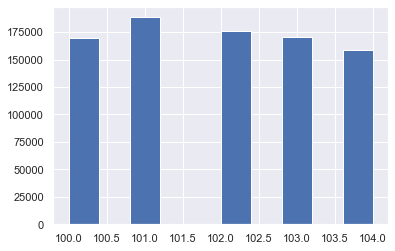

In [141]:
#import matplotlib.pyplot as plt
#plt.hist(interaction_matrix.timestamps.values)

In [142]:
#scenario = Timed(t=103, t_validation=102, delta_out=None, delta_in=None, validation=True) # weeks calculated with calculator.
#scenario.split(interaction_matrix)

In [143]:
#val_data = scenario.validation_data

In [146]:
# val_data

(<recpack.matrix.interaction_matrix.InteractionMatrix at 0x23c17a74ee0>,
 <recpack.matrix.interaction_matrix.InteractionMatrix at 0x23c17adbaf0>)

In [150]:
# from recpack.algorithms import Prod2Vec
# p2v = Prod2Vec()
# p2v.fit(scenario.full_training_data, (scenario.validation_data_in, scenario.validation_data_out))

In [157]:
from recpack.algorithms import KUNN
kunn = KUNN(Ku=10, Ki=10)
kunn.fit(interaction_matrix)

2022-11-29 20:19:33,671 - base - recpack - INFO - Fitting KUNN complete - Took 0.688s


KUNN(Ki=10, Ku=10)

In [158]:
predictions = kunn.predict(interaction_matrix)

MemoryError: Unable to allocate 15.8 GiB for an array with shape (111294, 19028) and data type float64

In [159]:
from recpack.algorithms import ItemKNN
knn = ItemKNN()
knn.fit(interaction_matrix)

2022-11-29 20:22:31,000 - base - recpack - INFO - Fitting ItemKNN complete - Took 2.69s


ItemKNN()

In [160]:
predictions = knn.predict(interaction_matrix)

In [161]:
from scipy.sparse import csr_matrix
def top_n_idx_sparse(matrix: csr_matrix, n: int):
    """Return index of top n values in each row of a sparse matrix.
    source: https://stackoverflow.com/questions/49207275/finding-the-top-n-values-in-a-row-of-a-scipy-sparse-matrix
    """
    top_n_idx = []
    for le, ri in zip(matrix.indptr[:-1], matrix.indptr[1:]):
        n_row_pick = min(n, ri - le)
        if n_row_pick == n:
          top_n_idx.append(matrix.indices[le + np.argpartition(matrix.data[le:ri], -n_row_pick)[-n_row_pick:]].tolist())
    
    # Get the values corresponding to the indices
    top_n_values = []
    for row_idx, col_idxs in enumerate(top_n_idx):
        top_n_values.append(matrix[row_idx, col_idxs].toarray().tolist()[0])
        assert(len(top_n_values[row_idx]) == len(top_n_idx[row_idx]))
    return top_n_idx, top_n_values

In [162]:
top_k_idx, top_k_values = top_n_idx_sparse(predictions, 12)
top_k_values

[[0.14313005487457595,
  0.14485895517167002,
  0.3985936465849862,
  0.24449765788537722,
  0.19488055614793295,
  0.14997882509033206,
  0.14662310665617917,
  0.14532958974404495,
  0.2547200004033525,
  0.3343757060953298,
  0.34446938114698467,
  0.18637482910274367],
 [0.2283282782162359,
  0.2457954497052739,
  0.26352507678049675,
  0.27274518831304423,
  0.2852643177041319,
  0.3277323980876721,
  0.2843202909434241,
  0.3849990768278158,
  0.4156714367077187,
  0.6120166529637505,
  0.39720268252886726,
  0.41963327584679333],
 [0.11048186455015065,
  0.11116832426622789,
  0.1217161238900369,
  0.12555085123490556,
  0.13531209698957725,
  0.2182178902359924,
  0.1406180433381787,
  0.1337224048029299,
  0.14170139741783622,
  0.12638403475595794,
  0.14139621322198126,
  0.12836612388093255],
 [0.1729575836202461,
  0.17506989330748704,
  0.19810721293758185,
  0.2061914191273807,
  0.34764153233918743,
  0.2436252738132375,
  0.2161616568580319,
  0.7668388029361489,
  0.2

In [163]:
uid_cid_map = interaction_matrix._df[["uid", "customer_id"]].drop_duplicates().set_index("uid").to_dict()["customer_id"]
iid_aid_map = interaction_matrix._df[["iid", "article_id"]].drop_duplicates().set_index("iid").to_dict()["article_id"]

ar_customers = []
ar_articles = []
ar_scores = []

for i, row in enumerate(top_k_idx):
        user_predictions = [iid_aid_map[iid] for iid in row]
        ar_customers.extend([uid_cid_map[i]] * len(user_predictions))
        ar_articles.extend(user_predictions)
        ar_scores.extend(top_k_values[i])
ar_items = pd.DataFrame({"customer_id": ar_customers, "article_id": ar_articles, "ar_prediction": ar_scores})

In [164]:
ar_items

,customer_id,article_id,ar_prediction
0,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,640021012,0.143130
1,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,798579013,0.144859
2,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,851124001,0.398594
3,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,717490071,0.244498
4,00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...,873093001,0.194881
...,...,...,...
1335523,338b81964735ce77bb63a0d44b8384e0ab7a2e59b5d810...,911700001,0.686084
1335524,338b81964735ce77bb63a0d44b8384e0ab7a2e59b5d810...,914449001,0.680489
1335525,338b81964735ce77bb63a0d44b8384e0ab7a2e59b5d810...,934835001,0.709715
1335526,338b81964735ce77bb63a0d44b8384e0ab7a2e59b5d810...,911699002,1.028114


In [165]:
candidates_similar_items = pd.merge(
    ar_items,
    test_set_transactions,
    on='customer_id',
    how='left'
)

candidates_similar_items.drop(columns='ar_prediction', inplace=True)
last_price = transactions \
    .groupby(['article_id', 'week']) \
    .price \
    .last() \
    .reset_index() \
    .groupby('article_id') \
    .price \
    .last() \
    .reset_index()

candidates_similar_items = pd.merge(
    candidates_similar_items,
    last_price,
    on='article_id',
    how='left'
)

In [166]:
popularity = transactions\
    .groupby(['article_id', 'week']).size().reset_index(name='weekly_purchase_count')
weekly_popularity = []
def func(row):
    weeks_before = popularity[(row.article_id == popularity.article_id) & (row.week > popularity.week)]
    # get last row of weeks_before
    previous_week_popularity = 0
    if weeks_before.shape[0] > 0:
        previous_week_popularity = weekly_popularity[-1]
    return previous_week_popularity / 2.0 + float(row.weekly_purchase_count)
# iterate over all rows
for i, row in popularity.iterrows():
    weekly_popularity.append(func(row))
popularity['weekly_popularity'] = weekly_popularity
popular_articles_per_week = popularity.sort_values(['week', 'weekly_popularity'], ascending=False)\
    .groupby('week').head(20).reset_index(drop=True)
popular_articles_previous_week = pd.merge(popular_articles_per_week, mean_price, on=['week', 'article_id']).reset_index(drop=True)
# make a new column to rank the weekly_popularity
popular_articles_previous_week['last_week_popularity_rank'] = popular_articles_previous_week.groupby('week')['weekly_popularity'].rank(ascending=False).astype(np.int32)
popular_articles_previous_week.week += 1

In [168]:
transactions['purchased'] = 1
d = pd.concat([transactions, candidates_last_purchase, candidates_similar_items])
d.purchased.fillna(0, inplace=True)

d.purchased.mean()

0.319933308632827

In [169]:
d.drop_duplicates(['customer_id', 'article_id', 'week'], inplace=True)

In [170]:
d = pd.merge(
    d,
    bestsellers_previous_week[['week', 'article_id', 'bestseller_rank']],
    on=['week', 'article_id'],
    how='left'
)
d = d[d.week != d.week.min()]

In [171]:
d = pd.merge(
    d, 
    ar_items[['customer_id', 'article_id', 'ar_prediction']], 
    on=['customer_id', 'article_id'], 
    how='left'
)

In [172]:
d = pd.merge(
    d,
    popular_articles_previous_week[['week', 'article_id', 'weekly_purchase_count', 'weekly_popularity', 'last_week_popularity_rank']],
    on=['week', 'article_id'],
    how='left'
)

In [173]:
d = pd.merge(d, articles, on='article_id', how='left')
d = pd.merge(d, dfCustomers, on='customer_id', how='left')

d['weekly_purchase_count'].fillna(0, inplace=True)
d['weekly_popularity'].fillna(0, inplace=True)
d['ar_prediction'].fillna(d['purchased'], inplace=True)
d['bestseller_rank'].fillna(d.bestseller_rank.max() + 1, inplace=True)
d['last_week_popularity_rank'].fillna(d.last_week_popularity_rank.max() + 1, inplace=True)
d.head()

,t_dat,customer_id,article_id,price,week,product_code_x,colour_group_code_x,detail_desc_0_x,detail_desc_1_x,detail_desc_2_x,...,detail_desc_7_y,detail_desc_8_y,detail_desc_9_y,detail_desc_10_y,detail_desc_11_y,detail_desc_12_y,detail_desc_13_y,detail_desc_14_y,detail_desc_15_y,pred_y
0,2020-09-22,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,845790006,0.031169,104,845790,9,0.261265,0.172485,-0.190863,...,0.199731,-0.020451,-0.035221,0.027265,-0.012119,-0.057685,-0.118253,-0.185181,0.025779,2
1,2020-08-28,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,845790001,0.033881,101,845790,9,0.261265,0.172485,-0.190863,...,0.199731,-0.020451,-0.035221,0.027265,-0.012119,-0.057685,-0.118253,-0.185181,0.025779,2
2,2020-09-22,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,610776002,0.007780,104,610776,9,-0.227569,0.233926,-0.146539,...,0.086352,-0.035207,-0.153003,0.003594,-0.035288,0.092900,0.019230,0.113773,-0.018723,2
3,2020-09-01,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,456163060,0.033881,101,456163,9,-0.150141,-0.156357,-0.107816,...,0.036018,-0.174206,-0.083094,0.149759,-0.042328,0.160299,-0.010329,0.062356,0.077242,2
4,2020-09-22,d8f49d574641eca9ecca7514f9abaeac56395c96dc844e...,889828001,0.023373,104,889828,9,-0.259440,-0.063735,-0.092460,...,-0.145319,-0.055258,0.088614,0.087821,0.082438,0.190645,0.103653,0.167380,-0.020871,2


In [174]:
d.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'week', 'product_code_x',
       'colour_group_code_x', 'detail_desc_0_x', 'detail_desc_1_x',
       'detail_desc_2_x', 'detail_desc_3_x', 'detail_desc_4_x',
       'detail_desc_5_x', 'detail_desc_6_x', 'detail_desc_7_x',
       'detail_desc_8_x', 'detail_desc_9_x', 'detail_desc_10_x',
       'detail_desc_11_x', 'detail_desc_12_x', 'detail_desc_13_x',
       'detail_desc_14_x', 'detail_desc_15_x', 'pred_x', 'purchased',
       'bestseller_rank', 'ar_prediction', 'weekly_purchase_count',
       'weekly_popularity', 'last_week_popularity_rank', 'product_code_y',
       'colour_group_code_y', 'detail_desc', 'str', 'tokens',
       'detail_desc_0_y', 'detail_desc_1_y', 'detail_desc_2_y',
       'detail_desc_3_y', 'detail_desc_4_y', 'detail_desc_5_y',
       'detail_desc_6_y', 'detail_desc_7_y', 'detail_desc_8_y',
       'detail_desc_9_y', 'detail_desc_10_y', 'detail_desc_11_y',
       'detail_desc_12_y', 'detail_desc_13_y', 'detail_desc

In [175]:
d.drop(
        columns=['product_code_y',
       'colour_group_code_y',
       'detail_desc_0_y', 'detail_desc_1_y', 'detail_desc_2_y',
       'detail_desc_3_y', 'detail_desc_4_y', 'detail_desc_5_y',
       'detail_desc_6_y', 'detail_desc_7_y', 'detail_desc_8_y',
       'detail_desc_9_y', 'detail_desc_10_y', 'detail_desc_11_y',
       'detail_desc_12_y', 'detail_desc_13_y', 'detail_desc_14_y',
       'detail_desc_15_y', 'pred_y'],inplace=True)

In [77]:
# d.drop(
#         columns=['age_x'], inplace=True)

In [178]:
d.drop(columns=[ 'detail_desc', 'str',
       'tokens'],inplace=True)

In [179]:
d.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'week', 'product_code_x',
       'colour_group_code_x', 'detail_desc_0_x', 'detail_desc_1_x',
       'detail_desc_2_x', 'detail_desc_3_x', 'detail_desc_4_x',
       'detail_desc_5_x', 'detail_desc_6_x', 'detail_desc_7_x',
       'detail_desc_8_x', 'detail_desc_9_x', 'detail_desc_10_x',
       'detail_desc_11_x', 'detail_desc_12_x', 'detail_desc_13_x',
       'detail_desc_14_x', 'detail_desc_15_x', 'pred_x', 'purchased',
       'bestseller_rank', 'ar_prediction', 'weekly_purchase_count',
       'weekly_popularity', 'last_week_popularity_rank'],
      dtype='object')

In [180]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
columns_to_scale = [
       'price', 'product_code_x',
       'colour_group_code_x', 'detail_desc_0_x', 'detail_desc_1_x',
       'detail_desc_2_x', 'detail_desc_3_x', 'detail_desc_4_x',
       'detail_desc_5_x', 'detail_desc_6_x', 'detail_desc_7_x',
       'detail_desc_8_x', 'detail_desc_9_x', 'detail_desc_10_x',
       'detail_desc_11_x', 'detail_desc_12_x', 'detail_desc_13_x',
       'detail_desc_14_x', 'detail_desc_15_x', 'pred_x',
       'ar_prediction', 'last_week_popularity_rank']
d[columns_to_scale] = scaler.fit_transform(d[columns_to_scale])
d.sort_values(['week', 'customer_id'], inplace=True)
d.reset_index(drop=True, inplace=True)
train = d[d.week != test_week]
test = d[d.week==test_week].drop_duplicates(['customer_id', 'article_id']).copy()
train_baskets = train.groupby(['week', 'customer_id'])['article_id'].count().values

columns_to_use = [ 'article_id', 'product_code_x',
       'colour_group_code_x', 'detail_desc_0_x', 'detail_desc_1_x',
       'detail_desc_2_x', 'detail_desc_3_x', 'detail_desc_4_x',
       'detail_desc_5_x', 'detail_desc_6_x', 'detail_desc_7_x',
       'detail_desc_8_x', 'detail_desc_9_x', 'detail_desc_10_x',
       'detail_desc_11_x', 'detail_desc_12_x', 'detail_desc_13_x',
       'detail_desc_14_x', 'detail_desc_15_x', 'pred_x', 'purchased',
        'ar_prediction', 'last_week_popularity_rank']

In [80]:
d.week

0          101
1          101
2          101
3          101
4          101
          ... 
3248594    105
3248595    105
3248596    105
3248597    105
3248598    105
Name: week, Length: 3248599, dtype: int64

In [181]:
train_X = train[columns_to_use]
train_y = train['purchased']

test_X = test[columns_to_use]

In [182]:
test_X

,article_id,product_code_x,colour_group_code_x,detail_desc_0_x,detail_desc_1_x,detail_desc_2_x,detail_desc_3_x,detail_desc_4_x,detail_desc_5_x,detail_desc_6_x,...,detail_desc_10_x,detail_desc_11_x,detail_desc_12_x,detail_desc_13_x,detail_desc_14_x,detail_desc_15_x,pred_x,purchased,ar_prediction,last_week_popularity_rank
1223879,568601043,-1.773773,2.740120,-0.035191,-1.883259,-0.611997,0.393701,-2.007918,0.820307,-0.438286,...,-0.852324,-0.647782,-0.737174,-0.225965,-0.379835,-1.134710,-1.576292,0.0,-0.887934,0.158880
1223880,794321007,-0.061720,-0.342661,-0.190537,-1.455238,-0.709981,0.481677,-1.962347,0.192284,-0.887534,...,-1.961759,0.255887,-1.393488,-1.119726,-0.095062,-1.250117,0.432392,0.0,-0.887934,0.158880
1223881,448509014,-2.684653,1.910141,1.669254,0.104434,-1.369547,0.166253,-0.164180,-1.085237,-0.146303,...,1.555729,0.094971,0.795848,1.210506,-0.425041,-0.425173,0.432392,0.0,-0.887934,-5.747327
1223882,719530003,-0.628998,-0.579798,1.525807,0.233160,-0.440281,0.190970,-0.879775,-0.649314,0.037167,...,-1.190466,-1.047701,-0.098602,0.242777,0.070834,0.641805,0.432392,0.0,-0.887934,0.158880
1223883,921226007,0.900836,0.763979,-2.038458,0.192391,0.749501,0.747611,-1.390438,0.381161,-0.160175,...,-0.099029,0.232121,-1.305842,0.428861,-1.111536,1.103336,1.436735,0.0,-0.887934,0.158880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198252,762846031,-0.057942,-0.579798,-0.469921,-0.081973,1.064484,-2.646544,0.507128,-0.261597,1.462961,...,0.423512,-0.491503,-1.224449,0.558514,-0.651487,-1.145282,-0.571950,0.0,-0.488591,0.158880
3198253,583976001,-0.057942,-0.579798,-0.469921,-0.081973,1.064484,-2.646544,0.507128,-0.261597,1.462961,...,0.423512,-0.491503,-1.224449,0.558514,-0.651487,-1.145282,-0.571950,0.0,-0.426397,0.158880
3198254,708090007,-0.057942,-0.579798,-0.469921,-0.081973,1.064484,-2.646544,0.507128,-0.261597,1.462961,...,0.423512,-0.491503,-1.224449,0.558514,-0.651487,-1.145282,-0.571950,0.0,-0.426397,0.158880
3198255,534210006,-0.057942,-0.579798,-0.469921,-0.081973,1.064484,-2.646544,0.507128,-0.261597,1.462961,...,0.423512,-0.491503,-1.224449,0.558514,-0.651487,-1.145282,-0.571950,0.0,-0.409773,0.158880


# training the model

In [183]:
from lightgbm.sklearn import LGBMRanker
ranker = LGBMRanker(
    objective="lambdarank",
    num_leaves=200,
    metric="ndcg",
    boosting_type="dart",
    n_estimators=100,
    importance_type='gain',
    verbose=10,
)

ranker = ranker.fit(
    train_X,
    train_y,
    group=train_baskets,
)

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.865290
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.075243
[LightGBM] [Debug] init for col-wise cost 0.016360 seconds, init for row-wise cost 0.099353 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 4911
[LightGBM] [Info] Number of data points in the train set: 1223879, number of used features: 23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, be

In [184]:
for i in ranker.feature_importances_.argsort()[::-1]:
    print(columns_to_use[i], ranker.feature_importances_[i]/ranker.feature_importances_.sum())

purchased 0.9999999999999998
article_id 1.7301554660723114e-16
detail_desc_2_x 1.9580099872309168e-17
detail_desc_6_x 1.538328443854659e-17
product_code_x 8.073601295625117e-18
detail_desc_9_x 3.711829033811762e-18
detail_desc_7_x 1.4746247923845719e-18
detail_desc_0_x 1.1129773235511017e-18
detail_desc_5_x 1.0056241459383171e-18
detail_desc_11_x 9.691034408995102e-19
detail_desc_4_x 8.981863156820708e-19
detail_desc_1_x 4.542893667722804e-19
colour_group_code_x 3.9245202165143614e-19
detail_desc_3_x 3.684726921753948e-19
ar_prediction 2.083093552198714e-19
detail_desc_10_x 1.8646020559524946e-19
detail_desc_13_x 1.2128937440423863e-19
detail_desc_8_x 6.445654477549106e-20
detail_desc_14_x 2.4712525929460138e-20
detail_desc_15_x 1.828212469786675e-20
detail_desc_12_x 5.272882142851935e-21
pred_x 4.529461056550179e-22
last_week_popularity_rank 0.0


In [185]:
test['preds'] = ranker.predict(test_X)

c_id2predicted_article_ids = test \
    .sort_values(['customer_id', 'preds'], ascending=False) \
    .groupby('customer_id')['article_id'].apply(list).to_dict()

bestsellers_last_week = \
    bestsellers_previous_week[bestsellers_previous_week.week == bestsellers_previous_week.week.max()]['article_id'].tolist()

In [186]:
sub = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/sample_submission.csv')

In [187]:
def customer_hex_id_to_int(series):
    return series.str[-16:].apply(hex_id_to_int)

def hex_id_to_int(str):
    return int(str[-16:], 16)

preds = []
for c_id in customer_hex_id_to_int(sub.customer_id):
    predd = c_id2predicted_article_ids.get(c_id, [])
    predd = predd + bestsellers_last_week
    preds.append(predd[:12])

In [188]:
preds = [' '.join(['0' + str(p) for p in ps]) for ps in preds]
sub.prediction = preds

In [189]:
sub.to_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project/sub.csv.gz', index=False)

In [190]:
sub

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0924243001 0918522001 0924243002 0923758001 08...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0924243001 0918522001 0924243002 0923758001 08...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0924243001 0918522001 0924243002 0923758001 08...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0924243001 0918522001 0924243002 0923758001 08...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0924243001 0918522001 0924243002 0923758001 08...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0924243001 0918522001 0924243002 0923758001 08...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0924243001 0918522001 0924243002 0923758001 08...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0924243001 0918522001 0924243002 0923758001 08...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0924243001 0918522001 0924243002 0923758001 08...
